In [1]:
from google.colab import files
uploaded = files.upload()

Saving mtcars.csv to mtcars.csv


In [2]:
!ls

mtcars.csv  sample_data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'mtcars.csv'
df = pd.read_csv(file_path, index_col=0)
print(df.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  




1.  info()
2.  결측치, dtype확인
3.  describe() 통계적 체크, value_counts, unique
4.  중요 변수 탐색 - 상관관계, 변수분포(박스플롯), 종속변수vs독립변수간 상관,독립변수간 상관관계는 높으면 중복의 현상
5. 파생변수 확인 - 탐색적 분석 시도, 파생변수와 종속변수간 상관관계 파악
6. 변수선택
7. 모델링 준비 - 변수간 스케일이 크면 표준화, 정규화 > 적용할 분석용 데이터 셋 준비



In [8]:
#파생변수 만들때 피벗테이블 만드는것이 필요
pivot_table = df.pivot_table(values='hp', index='cyl', columns='gear', aggfunc='mean', fill_value=0)
print(pivot_table)
#기어가 높고 기통이 클수록 마력이 커짐을 알수있음

gear           3      4      5
cyl                           
4      97.000000   76.0  102.0
6     107.500000  116.5  175.0
8     194.166667    0.0  299.5


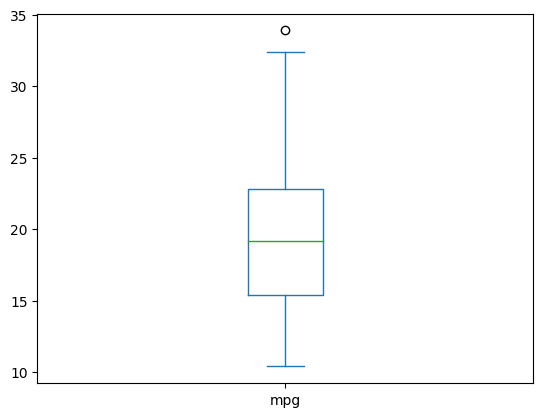

In [5]:
# df.plot.box()
df.plot.box(column='mpg')
plt.show()

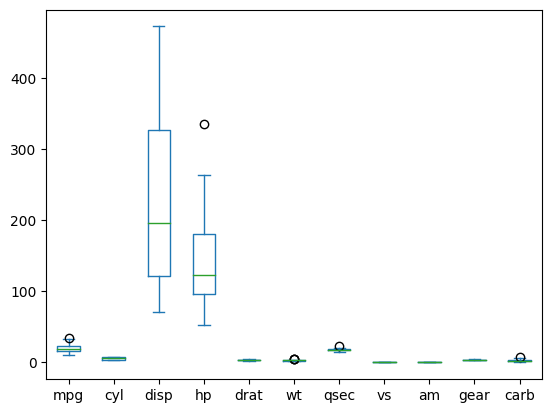

In [6]:
df.plot.box()
plt.show()

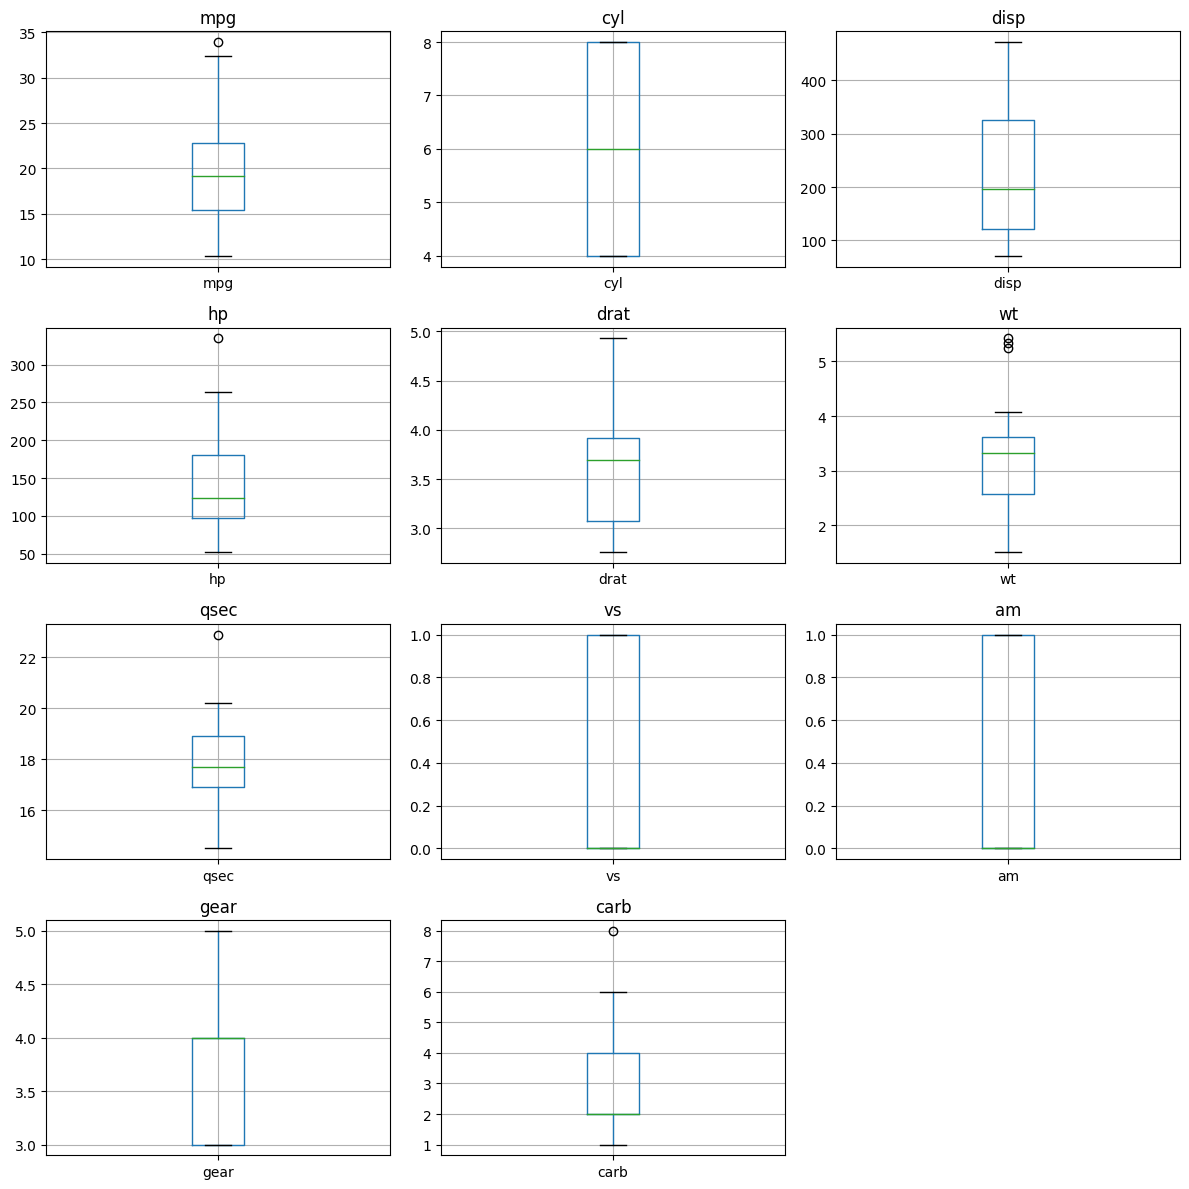

In [7]:
num_columns = len(df.columns)
plt.figure(figsize=(12,12))

for i, column in enumerate(df.columns):
    plt.subplot(4,3, i+1)
    df.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
df.info()
#null값이 없어서 널값 처리할 것이 없음

# mpg miles per gallen - 종속변수, 이걸 찾는것
# 나머지 컬럼이 독립변수
# 상관관계 파악 - 상관계수가 높은거 선택
#
# 표준화
# mpg: 연비(miles per gallon)
# cyl: 실린더 개수(number of cylinders)
# disp: 배기량(displacement)
# hp: 마력(horsepower)
# drat: 후륜비(rear axle ratio)
# wt: 차량 무게(weight)
# qsec: 1/4 마일 달성 시간(1/4 mile time)
# vs: 엔진 형태(V/S)
# am: 변속기 종류(automatic or manual)
# gear: 기어 수(number of gears)
# carb: 기화기 개수(number of carburetors)

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 4.0+ KB


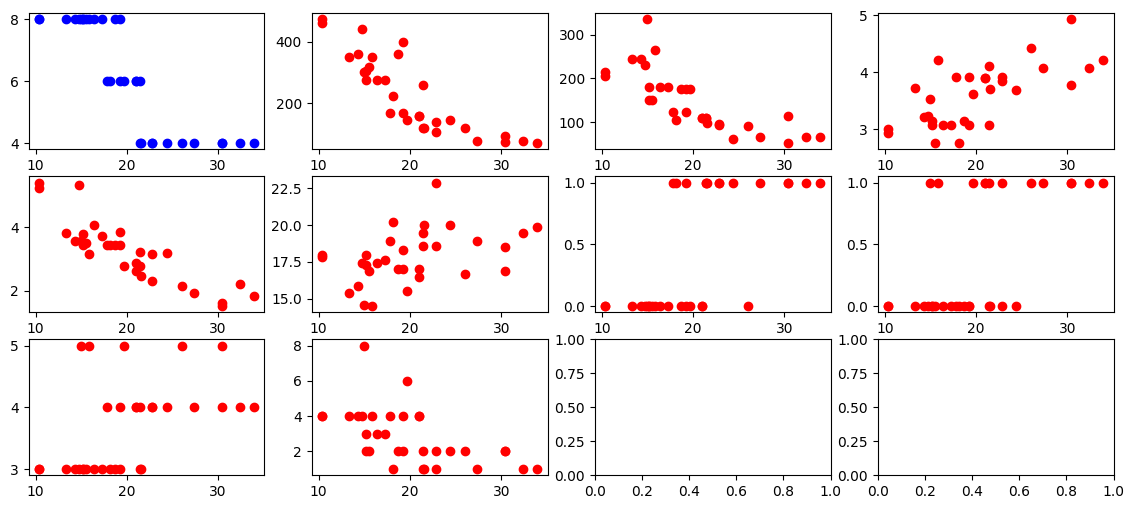

In [ ]:
fig, axs = plt.subplots(3,4,figsize=(14,6))

axs[0,0].scatter(df['mpg'],df['cyl'], color='blue')
axs[0,1].scatter(df['mpg'],df['disp'], color='red')
axs[0,2].scatter(df['mpg'],df['hp'], color='red')
axs[0,3].scatter(df['mpg'],df['drat'], color='red')
axs[1,0].scatter(df['mpg'],df['wt'], color='red')
axs[1,1].scatter(df['mpg'],df['qsec'], color='red')
axs[1,2].scatter(df['mpg'],df['vs'], color='red')
axs[1,3].scatter(df['mpg'],df['am'], color='red')
axs[2,0].scatter(df['mpg'],df['gear'], color='red')
axs[2,1].scatter(df['mpg'],df['carb'], color='red')
#산점도로 평가시 disp,hp, drat,wt 주요한 종속변수라 파악됨

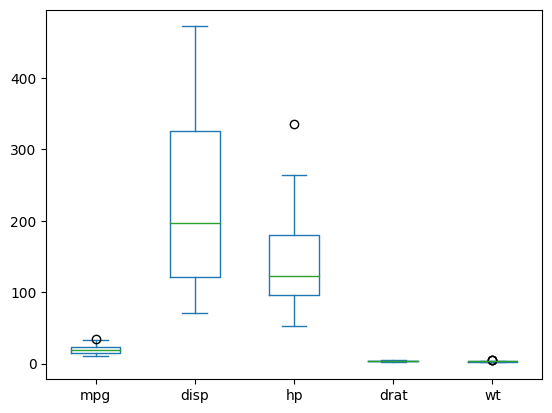

In [ ]:
#박스 플롯 disp,hp, drat,wt 그려봄
box_df = df[['mpg','disp','hp','drat','wt']]
box_df.plot.box()
plt.show()
#disp,hp와 다른 변수간의 스케일이 차이가 있으므로 모든 변수를 정규화, 표준화 시킨다.

In [9]:
#상관관계 계산

correlation_matrix = df.corr()
target_variable = 'mpg'
correlation_matrix[[target_variable]]

,mpg
mpg,1.000000
cyl,-0.852162
disp,-0.847551
hp,-0.776168
drat,0.681172
wt,-0.867659
qsec,0.418684
vs,0.664039
am,0.599832
gear,0.480285


In [12]:
#상관관계 계산

correlation_matrix = df.corr()
target_variable = 'mpg'
correlation_threshold = 0.5
cm=correlation_matrix[[target_variable]][abs(correlation_matrix[target_variable])> correlation_threshold].index.tolist()
print(f"Variables highly correlatied with {target_variable}: {cm}")

Variables highly correlatied with mpg: ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']


In [13]:
divmod(0,4)

(0, 0)

In [14]:
divmod(1,4)

(0, 1)

In [ ]:
# 분석할 컬럼들
columns = ['cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']
target = 'mpg'

# 2행 4열의 subplot 설정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# 각 subplot에 산점도 그리기
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 4)
    df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f'{target} vs {col}')

# 전체 제목 설정
fig.suptitle(f'{target} vs Selected Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
#상관계수 히트맵


In [15]:
#종속변수 빼고 표준화
from sklearn.preprocessing import StandardScaler

correlated_features = [ 'mpg','disp', 'hp', 'drat', 'wt']
# 분석용 데이터셋 구축
analysis_df = df[correlated_features]
target_variable = 'mpg'
# 데이터셋 확인
print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

                    mpg   disp   hp  drat     wt
Mazda RX4          21.0  160.0  110  3.90  2.620
Mazda RX4 Wag      21.0  160.0  110  3.90  2.875
Datsun 710         22.8  108.0   93  3.85  2.320
Hornet 4 Drive     21.4  258.0  110  3.08  3.215
Hornet Sportabout  18.7  360.0  175  3.15  3.440
       disp        hp      drat        wt   mpg
0 -0.579750 -0.543655  0.576594 -0.620167  21.0
1 -0.579750 -0.543655  0.576594 -0.355382  21.0
2 -1.006026 -0.795570  0.481584 -0.931678  22.8
3  0.223615 -0.543655 -0.981576 -0.002336  21.4
4  1.059772  0.419550 -0.848562  0.231297  18.7


In [ ]:
#표준화
def z_score(x):
    return (x - x.mean()) / x.std()

standize_df = df[['mpg','disp','hp','drat','wt']].transform(z_score)
print(standize_df.head())
scaled_df = standize_df
target_variable = 'mpg'

                        mpg      disp        hp      drat        wt
Mazda RX4          0.150885 -0.570620 -0.535093  0.567514 -0.610400
Mazda RX4 Wag      0.150885 -0.570620 -0.535093  0.567514 -0.349785
Datsun 710         0.449543 -0.990182 -0.783040  0.474000 -0.917005
Hornet 4 Drive     0.217253  0.220094 -0.535093 -0.966118 -0.002300
Hornet Sportabout -0.230735  1.043081  0.412942 -0.835198  0.227654


In [ ]:
#상관관계 파악
whole_corr_df = df
print("mpg에 대한 상관관계")
print(whole_corr_df.corr()['mpg'].sort_values)

corr_df = df[['mpg','disp','hp','drat','wt']]
print("예상 변수간 상관관계")
print(corr_df.corr()['mpg'].sort_values)

mpg에 대한 상관관계
<bound method Series.sort_values of mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64>
예상 변수간 상관관계
<bound method Series.sort_values of mpg     1.000000
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
Name: mpg, dtype: float64>


In [ ]:
#표준화한 상태의 상관계수 계산
whole_standize_df = df.transform(z_score)
print(whole_standize_df)

corr_whole_standize_df = whole_standize_df.corr()
print(corr_whole_standize_df)

                          mpg       cyl      disp        hp      drat  \
Mazda RX4            0.150885 -0.104988 -0.570620 -0.535093  0.567514   
Mazda RX4 Wag        0.150885 -0.104988 -0.570620 -0.535093  0.567514   
Datsun 710           0.449543 -1.224858 -0.990182 -0.783040  0.474000   
Hornet 4 Drive       0.217253 -0.104988  0.220094 -0.535093 -0.966118   
Hornet Sportabout   -0.230735  1.014882  1.043081  0.412942 -0.835198   
Valiant             -0.330287 -0.104988 -0.046167 -0.608019 -1.564608   
Duster 360          -0.960789  1.014882  1.043081  1.433903 -0.722981   
Merc 240D            0.715018 -1.224858 -0.677931 -1.235180  0.174754   
Merc 230             0.449543 -1.224858 -0.725535 -0.753870  0.604919   
Merc 280            -0.147774 -0.104988 -0.509299 -0.345486  0.604919   
Merc 280C           -0.380064 -0.104988 -0.509299 -0.345486  0.604919   
Merc 450SE          -0.612354  1.014882  0.363713  0.485868 -0.984820   
Merc 450SL          -0.463025  1.014882  0.363713  

In [ ]:
#전체 표준화후 상관계수 계산시 mpg, cyl, disp,hp,wt가 상관계수가 높다
#따라서 scaled_df는 df[['mpg','disp','hp','cyl','wt']]로 결정
scaled_df = df[['mpg','disp','hp','drat','cyl','wt']]
target_variable = 'mpg'

In [ ]:
#전체 표준화후 상관계수 계산시 mpg, cyl, disp,hp,wt가 상관계수가 높다
#따라서 scaled_df는 df[['mpg','disp','hp','cyl','wt']]로 결정
scaled_df = df[['mpg','disp','hp','cyl','wt']]
target_variable = 'mpg'

In [ ]:
#다른 변수 추가시 r2값 변화 측정을 위한 시도 기존 독립변수중 상관계수가 가장
#낮은 hp제외
scaled_df = df[['mpg','disp','cyl','wt']]
target_variable = 'mpg'

In [ ]:
#다른 변수 추가시 r2값 변화 측정을 위한 시도 기존 독립변수중 상관계수가 가장
#낮은 disp제외
scaled_df = df[['mpg','cyl','wt']]
target_variable = 'mpg'

In [ ]:
#다른 변수 추가시 r2값 변화 측정을 위한 시도 기존 독립변수중 상관계수가 가장
#낮은 cyl제외
scaled_df = df[['mpg','wt']]
target_variable = 'mpg'

In [ ]:
# scaled_df = df[['mpg','disp','hp','cyl','wt','am','carb','vs','gear']]
scaled_df = df[['mpg','disp','hp','cyl','wt','am','carb','vs','gear']]
scaled_df = df[['mpg','disp','hp','cyl','wt','am','carb','vs','gear']]
scaled_df = df[['mpg','disp','hp','cyl','wt','am','carb','vs','gear']]
scaled_df = df[['mpg','disp','hp','cyl','wt','am','carb','vs','gear']]
target_variable = 'mpg'

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 8.99
Root Mean Squared Error: 3.0
R-squared: 0.78


In [ ]:
#전체 표준화후 상관계수 계산시 mpg, cyl, disp,hp,wt가 상관계수가 높다
#따라서 scaled_df는 df[['mpg','disp','hp','cyl','wt']]로 결정
scaled_df = df[['mpg','disp','hp','drat','cyl','wt']]
target_variable = 'mpg'

# Mean Squared Error: 7.73
# Root Mean Squared Error: 2.78
# R-squared: 0.81

In [ ]:
#Mean Squared Error: 7.19
#Root Mean Squared Error: 2.68
#R-squared: 0.82
scaled_df = df[['mpg','disp','hp','cyl','wt']]
#R-squared값이 82점이 나옴
#더 좋은 결과를 위해 파생변수를 탐색이 요구됨


In [ ]:
#다른 변수 추가시 r2값 변화 측정을 위한 시도 기존 독립변수중 상관계수가 가장
#낮은 hp제외
scaled_df = df[['mpg','disp','cyl','wt']]
target_variable = 'mpg'

#Mean Squared Error: 8.22
#Root Mean Squared Error: 2.87
#R-squared: 0.79

In [ ]:
#다른 변수 추가시 r2값 변화 측정을 위한 시도 기존 독립변수중 상관계수가 가장
#낮은 disp제외
scaled_df = df[['mpg','cyl','wt']]
target_variable = 'mpg'

#Mean Squared Error: 8.28
#Root Mean Squared Error: 2.88
#R-squared: 0.79


In [ ]:
#다른 변수 추가시 r2값 변화 측정을 위한 시도 기존 독립변수중 상관계수가 가장
#낮은 cyl제외
scaled_df = df[['mpg','wt']]
target_variable = 'mpg'

# Mean Squared Error: 12.48
# Root Mean Squared Error: 3.53
# R-squared: 0.69

#단일 독립변수나 독립변수가 적다고 하더라도 제대로된 예측을 하는것은 아니다
